In [2]:
# setup 
import numpy as np
import sympy as sp
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

Using matplotlib backend: Qt4Agg


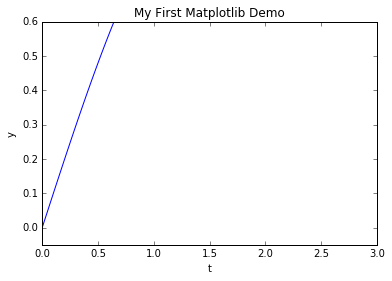

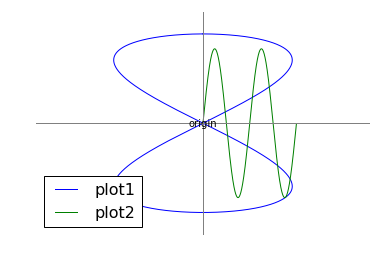

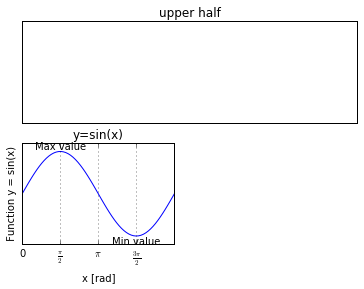

In [8]:
from matplotlib.pyplot import *
from numpy import *

t = np.linspace(0,1,100)
y = np.sin(t)
plt.axis([0, 3, -0.05, 0.6]) # [tmin, tmax, ymin, ymax]

plt.plot(t, y, label = 't^2*exp(-t^2)')
#plt.plot(t, y)
#plt.legend(['t^2*exp(-t^2)'])
plt.xlabel('t')
plt.ylabel('y')
plt.axis([0, 3, -0.05, 0.6]) # [tmin, tmax, ymin, ymax]
plt.title('My First Matplotlib Demo')
plt.show()

# axis , pg 194, beginning python visualzation
axis()
axis('auto')
axis('tight')
axis('off') # removes axis and labels
axis('equal') # good for gps plots
# axis([xmin,xmax,ymin,ymax])

#plotting example with grid and xtick
R=1.2
I = arange(0, 4*pi, 0.01)
plot(sin(I)*R, cos(0.5*I)*R,label='plot1')
plot(I/10, sin(I),label='plot2')
axhline(color = 'gray')
axvline(color='gray')
grid(True)
xticks([-1,0,1] , ('Negative','Neutral','Positive'))
yticks(arange(-1.5, 2.0,1))
legend(loc='best')
legend(loc='lower left')
text(0,0, 'origin', verticalalignment='center', horizontalalignment='center')

# subplots
figure()
subplot(2,1,1)
xticks([]) ; yticks([])
title('upper half')
subplot(2,2,3)
title(' lower left')
xticks([]) ; yticks([])


I = arange(0, 2*pi+0.1, 0.1)
plot(I,sin(I), label='sin(I)')
title('y=sin(x)')
xlabel('x [rad]')
ylabel(' Function y = sin(x)')
text(pi/2,1, 'Max value', ha = 'center', va='bottom')
text(3*pi/2,-1, 'Min value', ha = 'center', va='top')
xticks(arange(0, 2*pi, pi/2), ('0', r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$'))
xlim([0, 2*pi])
ylim([-1.2, 1.2])
grid() 



In [74]:
# if ipython is to be used as a calculator initialize with 
from sympy import init_session
init_session() 

IPython console for SymPy 0.7.6.1 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


In [75]:
from sympy import oo, Function, dsolve, Eq, Derivative, sin,cos,symbols
from sympy.abc import x
import sympy as sp
import numpy as np
import matplotlib.pyplot as mp
get_ipython().magic('matplotlib inline')
# this will print output as unicode

In [76]:
# assign a sympy variable
x = sp.var('x')
x

In [77]:
#assign a function 
f =  sp.sin(6*x)*sp.exp(-x)
f

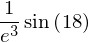

In [78]:
f.subs(x,3)

In [79]:
float(f.subs(x,3))

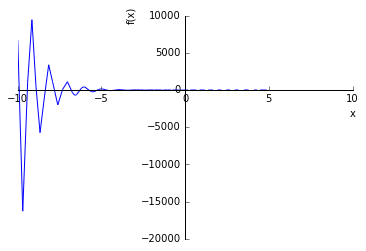

In [80]:
sp.plot(f);

In [81]:
# a onetime pretty print
sp.pprint(f)

 -x         
ℯ  ⋅sin(6⋅x)


In [82]:
#or we can print the latex rendering
sp.latex(f)

'e^{- x} \\sin{\\left (6 x \\right )}'

In [83]:
sp.init_printing(use_latex=False)
f

 -x         
ℯ  ⋅sin(6⋅x)

In [84]:
sp.init_printing(use_latex='mathjax')
f

 -x         
ℯ  ⋅sin(6⋅x)

In [85]:
# first derivative
df = f.diff()
df

   -x               -x         
- ℯ  ⋅sin(6⋅x) + 6⋅ℯ  ⋅cos(6⋅x)

In [86]:
# differentaite f'' wrt x
sp.diff(f,x,1)

   -x               -x         
- ℯ  ⋅sin(6⋅x) + 6⋅ℯ  ⋅cos(6⋅x)

In [87]:
# differentaite third derivative f'' wrt x
sp.diff(f,x,3)

                               -x
(107⋅sin(6⋅x) - 198⋅cos(6⋅x))⋅ℯ  

In [88]:
# substitute x with pi
f.subs(x,np.pi)

-3.17530720082064e-17

In [89]:
#%% Numeric Computation from the documentation
from sympy.abc import x

In [90]:
# substitution, this method is slow!
expr = sp.sin(x)/x
expr.evalf(subs={x:3.14})

0.000507214304613640

In [91]:
# lambdify using the math module, 10^2 faster than subs
expr = sp.sin(x)/x
f = sp.lambdify(x,expr)
f(3.14)

0.0005072143046136395

In [92]:
# lambdify using numpy
expr = sp.sin(x)/x
f = sp.lambdify(x,expr, "numpy")
f(np.linspace(1,3.14,20))

array([  8.415e-01,   8.061e-01,   7.679e-01,   7.273e-01,   6.844e-01,   6.397e-01,   5.934e-01,   5.460e-01,   4.976e-01,   4.487e-01,   3.996e-01,
         3.506e-01,   3.021e-01,   2.543e-01,   2.077e-01,   1.624e-01,   1.188e-01,   7.716e-02,   3.765e-02,   5.072e-04])

In [93]:
z = np.arange(0,6,.02)
z

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
        0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ,  1.02,  1.04,  1.06,  1.08,  1.1 ,  1.12,  1.14,  1.16,  1.18,
        1.2 ,  1.22,  1.24,  1.26,  1.28,  1.3 ,  1.32,  1.34,  1.36,  1.38,  1.4 ,  1.42,  1.44,  1.46,  1.48,  1.5 ,  1.52,  1.54,  1.56,  1.58,
        1.6 ,  1.62,  1.64,  1.66,  1.68,  1.7 ,  1.72,  1.74,  1.76,  1.78,  1.8 ,  1.82,  1.84,  1.86,  1.88,  1.9 ,  1.92,  1.94,  1.96,  1.98,
        2.  ,  2.02,  2.04,  2.06,  2.08,  2.1 ,  2.12,  2.14,  2.16,  2.18,  2.2 ,  2.22,  2.24,  2.26,  2.28,  2.3 ,  2.32,  2.34,  2.36,  2.38,
        2.4 ,  2.42,  2.44,  2.46,  2.48,  2.5 ,  2.52,  2.54,  2.56,  2.58,  2.6 ,  2.62,  2.64,  2.66,  2.68,  2.7 ,

In [94]:
# create an array from 0 to 6 with 300 points
z = np.linspace(0,6,300)
z

array([ 0.   ,  0.02 ,  0.04 ,  0.06 ,  0.08 ,  0.1  ,  0.12 ,  0.14 ,  0.161,  0.181,  0.201,  0.221,  0.241,  0.261,  0.281,  0.301,  0.321,  0.341,
        0.361,  0.381,  0.401,  0.421,  0.441,  0.462,  0.482,  0.502,  0.522,  0.542,  0.562,  0.582,  0.602,  0.622,  0.642,  0.662,  0.682,  0.702,
        0.722,  0.742,  0.763,  0.783,  0.803,  0.823,  0.843,  0.863,  0.883,  0.903,  0.923,  0.943,  0.963,  0.983,  1.003,  1.023,  1.043,  1.064,
        1.084,  1.104,  1.124,  1.144,  1.164,  1.184,  1.204,  1.224,  1.244,  1.264,  1.284,  1.304,  1.324,  1.344,  1.365,  1.385,  1.405,  1.425,
        1.445,  1.465,  1.485,  1.505,  1.525,  1.545,  1.565,  1.585,  1.605,  1.625,  1.645,  1.666,  1.686,  1.706,  1.726,  1.746,  1.766,  1.786,
        1.806,  1.826,  1.846,  1.866,  1.886,  1.906,  1.926,  1.946,  1.967,  1.987,  2.007,  2.027,  2.047,  2.067,  2.087,  2.107,  2.127,  2.147,
        2.167,  2.187,  2.207,  2.227,  2.247,  2.268,  2.288,  2.308,  2.328,  2.348,  2.368,

In [95]:
## ODE Sympy from documentation

# see here for example scripts
# C:\Users\Neal\Anaconda3\Lib\site-packages\sympy\mpmath\tests

from sympy import Function, dsolve, Eq, Derivative, sin,cos,symbols
from sympy.abc import x
import numpy as np
import sympy as sp
import matplotlib.pyplot as mp

In [96]:
f = Function('f')
deq = dsolve(Derivative(f(x), x,x) + 9*f(x), f(x))
deq

f(x) = C₁⋅sin(3⋅x) + C₂⋅cos(3⋅x)

In [97]:
diffeq1_sym = deq.args[1]
diffeq1_sym

C₁⋅sin(3⋅x) + C₂⋅cos(3⋅x)

In [98]:
diffeq1 = diffeq1_sym.subs({'C1':1, 'C2':0.5})
diffeq1

sin(3⋅x) + 0.5⋅cos(3⋅x)

In [99]:
diffeq1_f = sp.lambdify(x,diffeq1, "numpy")
diffeq1_f

<function numpy.<lambda>>

In [100]:
diffeq1arr = diffeq1_f(np.linspace(1,3.14,20))
diffeq1arr

array([-0.354, -0.685, -0.939, -1.087, -1.112, -1.011, -0.796, -0.491, -0.13 ,  0.246,  0.593,  0.874,  1.056,  1.118,  1.054,  0.871,  0.589,  0.241,
       -0.135, -0.495])

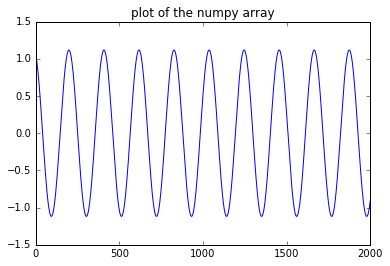

In [101]:
mp.plot(diffeq1_f(np.linspace(-10,10,2000)));
mp.title('plot of the numpy array');

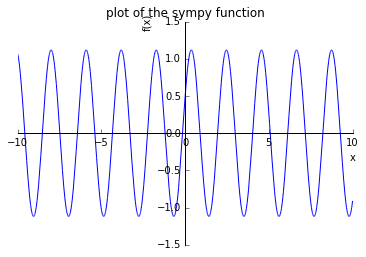

In [102]:
sp.plot(diffeq1, title='plot of the sympy function');

In [103]:
eq = sin(x)*cos(f(x)) + cos(x)*sin(f(x))*f(x).diff(x)
dsolve(eq, hint='1st_exact')

⎡             ⎛  C₁  ⎞                   ⎛  C₁  ⎞⎤
⎢f(x) = - acos⎜──────⎟ + 2⋅π, f(x) = acos⎜──────⎟⎥
⎣             ⎝cos(x)⎠                   ⎝cos(x)⎠⎦

In [104]:
#or
dsolve(eq, hint='almost_linear')

⎡             ⎛      _________⎞                     ⎛     _________⎞          
⎢             ⎜     ╱    C₁   ⎟                     ⎜    ╱    C₁   ⎟          
⎢f(x) = - acos⎜-   ╱  ─────── ⎟ + 2⋅π, f(x) = - acos⎜   ╱  ─────── ⎟ + 2⋅π, f(
⎢             ⎜   ╱      2    ⎟                     ⎜  ╱      2    ⎟          
⎣             ⎝ ╲╱    cos (x) ⎠                     ⎝╲╱    cos (x) ⎠          

         ⎛      _________⎞             ⎛     _________⎞⎤
         ⎜     ╱    C₁   ⎟             ⎜    ╱    C₁   ⎟⎥
x) = acos⎜-   ╱  ─────── ⎟, f(x) = acos⎜   ╱  ─────── ⎟⎥
         ⎜   ╱      2    ⎟             ⎜  ╱      2    ⎟⎥
         ⎝ ╲╱    cos (x) ⎠             ⎝╲╱    cos (x) ⎠⎦

In [105]:
t = symbols('t')
x,y = symbols('x, y', function=True)

In [106]:
eq = (Eq(Derivative(x(t),t), 12*t*x(t) + 8*y(t)), Eq(Derivative(y(t),t), 21*x(t) + 7*t*y(t)))
dsolve(eq)

⎡                     ⌠                                             ⎛   ⌠     
⎢                     ⎮    ⌠         ⌠                              ⎜   ⎮    ⌠
⎢                     ⎮    ⎮ 7⋅t dt  ⎮ 12⋅t dt                      ⎜   ⎮    ⎮
⎢                     ⎮    ⌡         ⌡                              ⎜   ⎮    ⌡
⎢                     ⎮ 8⋅ℯ        ⋅ℯ                               ⎜   ⎮ 8⋅ℯ 
⎢x(t) = C₁⋅x₀ + C₂⋅x₀⋅⎮ ────────────────────── dt, y(t) = C₁⋅y₀ +   ⎜y₀⋅⎮ ────
⎢                     ⎮            2                                ⎜   ⎮     
⎢                     ⎮          x₀                                 ⎜   ⎮     
⎣                     ⌡                                           C₂⎝   ⌡     

                                            ⎞⎤
         ⌠               ⌠         ⌠        ⎟⎥
 7⋅t dt  ⎮ 12⋅t dt       ⎮ 7⋅t dt  ⎮ 12⋅t dt⎟⎥
         ⌡               ⌡         ⌡        ⎟⎥
       ⋅ℯ               ℯ        ⋅ℯ         ⎟⎥
────────────────── dt + ────────────────────⎟⎥
      

In [107]:
eq = (Eq(Derivative(x(t),t),x(t)*y(t)*sin(t)), Eq(Derivative(y(t),t),y(t)**2*sin(t)))
dsolve(eq)

   ⎛⎡              C₁                          ⎤⎞
   ⎜⎢            -ℯ                     -1     ⎥⎟
set⎜⎢x(t) = ───────────────, y(t) = ───────────⎥⎟
   ⎜⎢           C₁                  C₁ - cos(t)⎥⎟
   ⎝⎣       C₂⋅ℯ   - cos(t)                    ⎦⎠

In [108]:
# ODE examples from test_ode.py
from sympy.mpmath import odefun, cos, sin, mpf, sinc, mp, plot

In [109]:
mp.dps = 15
# A rational function
f = lambda t: 1/(1+mpf(t)**2)
f

<function __main__.<lambda>>

In [110]:
g = odefun(lambda x, y: [-2*x*y[0]**2], 0, [f(0)])
g

<function sympy.mpmath.calculus.odes.odefun.<locals>.interpolant>

In [111]:
# Sinc function; test for large x
f = sinc
f

<bound method PythonMPContext._wrap_specfun.<locals>.f_wrapped of <sympy.mpmath.ctx_mp.MPContext object at 0x000001F04D714DA0>>

In [112]:
g = odefun(lambda x, y: [(cos(x)-y[0])/x], 1, [f(1)], tol=0.01, degree=5)
g

<function sympy.mpmath.calculus.odes.odefun.<locals>.interpolant>

In [113]:
# Harmonic oscillator
f = odefun(lambda x, y: [-y[1], y[0]], 0, [1, 0])
f

<function sympy.mpmath.calculus.odes.odefun.<locals>.interpolant>

In [114]:
#pretty plots
from sympy import sin, symbols, dsolve, pprint, Function
from sympy.solvers.ode import odesimp
x,u2,C1 = symbols('x,u2,C1')
f = Function('f')
eq = dsolve(x*f(x).diff(x) - f(x) - x*sin(f(x)/x), f(x), hint='1st_homogeneous_coeff_subs_indep_div_dep_Integral', simplify=False)
eq2 = odesimp(eq, f(x), 1, set([C1]), hint='1st_homogeneous_coeff_subs_indep_div_dep')

In [115]:
eq

                       x                         
                      ────                       
                      f(x)                       
                       ⌠                         
                       ⎮    ⎛        1   ⎞       
                       ⎮   -⎜u₂ + ───────⎟       
                       ⎮    ⎜        ⎛1 ⎞⎟       
                       ⎮    ⎜     sin⎜──⎟⎟       
                       ⎮    ⎝        ⎝u₂⎠⎠       
log(f(x)) = log(C₁) +  ⎮   ──────────────── d(u₂)
                       ⎮           2             
                       ⎮         u₂              
                       ⌡                         
                                                 

In [116]:
eq2

f(x) = 2⋅x⋅atan(C₁⋅x)

In [117]:
f = Function('f')
eq = dsolve(2*x*f(x) + (x**2 + f(x)**2)*f(x).diff(x), f(x), hint = '1st_homogeneous_coeff_best', simplify=False)
eq

                         ⎛    2    ⎞
                         ⎜ 3⋅x     ⎟
                      log⎜───── + 1⎟
                         ⎜ 2       ⎟
                         ⎝f (x)    ⎠
log(f(x)) = log(C₁) - ──────────────
                            3       

In [118]:
# Ordinary Differential Equations
from sympy.mpmath import *
mp.dps = 15
mp.pretty = True
# solves ODE y'(x) =y(x), y(0)=1
f = odefun(lambda x,y:y,0,1)
for x in [0,1,2.5]:
    print(f(x), exp(x))

1.0 1.0
2.71828182845905 2.71828182845905
12.1824939607035 12.1824939607035


In [119]:
# a nonlinear ODE
# y'(x) = x*sin(y(x)), y(0)=pi/2 
# the exact solution is y(x) = 2*atan(exp(x**2/2))
f = odefun(lambda x,y:x*sin(y),0,pi/2)
fexact = lambda x :2*atan(exp(x**2/2))
for x in [2,5,10]:
    print(f(x), 2*atan(exp(mpf(x)**2/2)))

2.87255666284091 2.87255666284091
3.14158520028345 3.14158520028345
3.14159265358979 3.14159265358979


In [120]:
import matplotlib.pyplot as mp

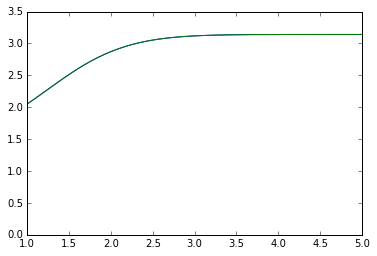

In [121]:
z = np.linspace(1,5,200)
fplot = np.array([f(x) for x in z])
fexactplot = np.array([fexact(x) for x in z])
mp.plot(z,fplot, z, fexactplot)
mp.plot(z,fexactplot-fplot)

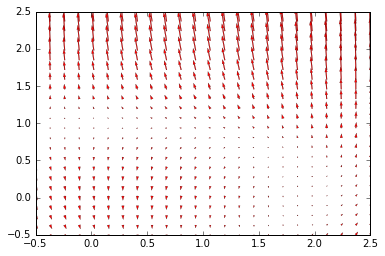

In [122]:
f=lambda x: [x[0]**2 - 2*x[0] - x[1] + 0.5, x[0]**2 + 4*x[1]**2 - 4]
x,y=np.mgrid[-0.5:2.5:24j,-0.5:2.5:24j]
U,V=f([x,y])
mp.quiver(x,y,U,V,color='r', \
         linewidths=(0.2,), edgecolors=('k'), \
         headaxislength=5)
mp.show()

## From the book, Introduction for Python for Science - David Pine
in scipy we can use scipy.integrate.ode and scipy.integrate.odeint. ode is more versatile, but odeint is simplier. This is an example of a driven damped pendulumn given 
t=time
Q=Quantity factor
d=forcing amplitude
O=driving frequency

we will need n initial condition for an nth order ode, in this case n=2

We will start by transforming our second order ODE into two coupled first order ODEs. 

the form will be as such
```
odeint(func, y0,t,args=())
```



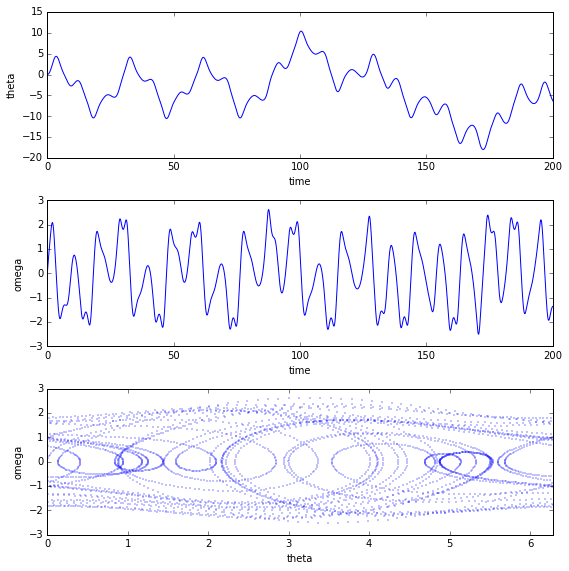

In [123]:
import numpy as np
import matplotlib.pyplot as mp
from scipy.integrate import odeint

def f(y,t,params):
    theta, omega = y
    Q,d,Omega = params
    derivs = [omega,
             -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return derivs

# Parameters
Q = 2.0     # quality factor (inverse damping)
d = 1.5   # forcing amplitude
Omega = 0.65  # drive frequency

# initial values
theta0 = 0.0    # inital angular displacement
omega0 = 0.0   # initial angular velocity

# bundle the parameters for the solver
params = [Q,d, Omega]

# bundle the inital conditions for the ODE solver
y0 = [theta0, omega0]

# make the time array for the solution
tStop = 200.
tInc = 0.05
t = np.arange(0., tStop, tInc)

#Call the ODE solver
psoln = odeint(f,y0,t,args=(params,))

# plot results
fig = mp.figure(1,figsize=(8,8))

# plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t,psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t,psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')

# plot omega vs theta
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')
ax3.set_xlim(0., twopi)

mp.tight_layout()
mp.show()



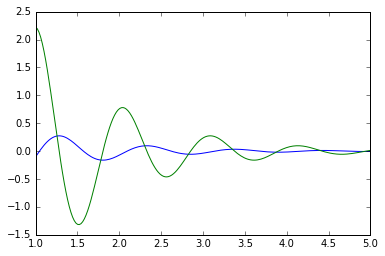

In [124]:
# one way to plot using symbolic math
x = sp.var('x')
f =  sp.sin(6*x)*sp.exp(-x)
df = f.diff()
w = np.array([f.subs(x,k) for k in z])
dw = np.array([df.subs(x,k) for k in z])

mp.plot(z,w,z,dw);

In [125]:
# integration, where is the constant?
df.integrate(x,(x,0,1))

     -1           -1            
  6⋅ℯ  ⋅cos(6)   ℯ  ⋅sin(6)   6 
- ──────────── - ────────── + ──
       37            37       37

In [126]:
p = df.integrate(x,(x,3,oo))
p

 -3              -3        
ℯ  ⋅sin(18)   6⋅ℯ  ⋅cos(18)
─────────── + ─────────────
     37             37     

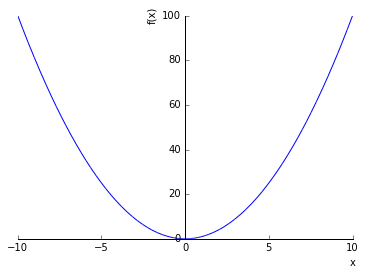

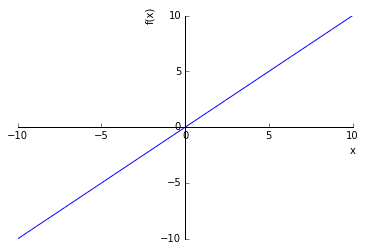

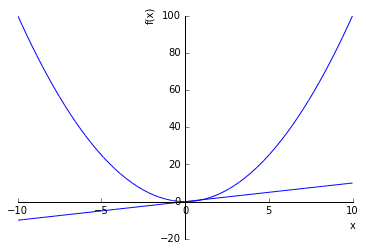

In [127]:
#%% Sympy Plotting

# shows two plots together
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x*x)
p2 = plot(x)
p1.extend(p2)
p1.show()

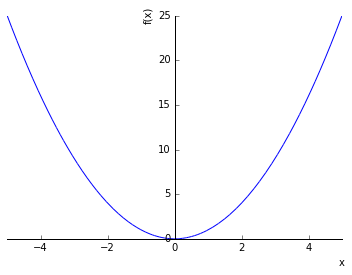

In [128]:
#single plot with range
plot(x**2, (x,-5,5));

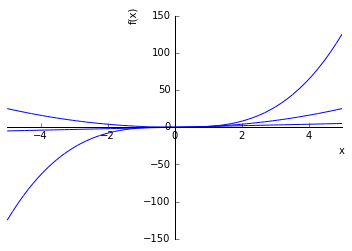

In [129]:
#multiple plots with range
plot(x,x**2,x**3, (x,-5,5))

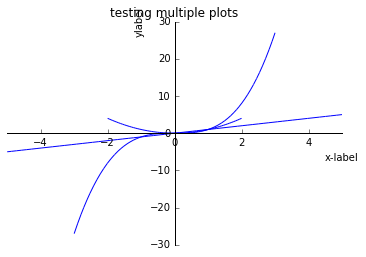

In [130]:
#multiple plots with different ranges
plot( (x, (x,-5,5)), (x**2, (x,-2,2)), (x**3, (x,-3,3)), 
     title='testing multiple plots',
     xlabel='x-label',
     ylabel='ylabel')

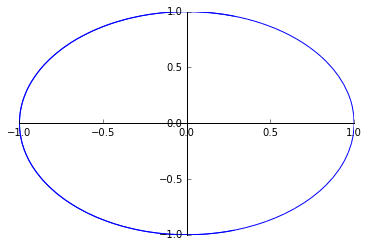

In [131]:
# parametric plots
from sympy import symbols, cos,sin
from sympy.plotting import plot_parametric
u = symbols('x')
plot_parametric(cos(u), sin(u), (u,-5,5))

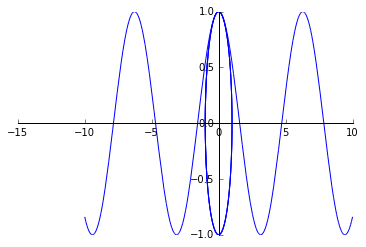

In [132]:
#multiple parametric plots with a single range
plot_parametric((cos(u), sin(u)), (u,cos(u)))

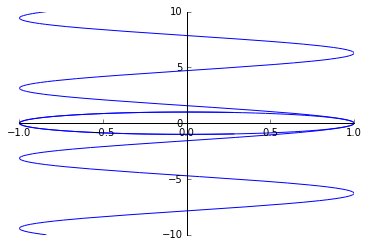

In [133]:
# multiple parametric plots with multiple ranges
plot_parametric((cos(u), sin(u), (u,-5,5)), (cos(u), u, (u,-10,10)))

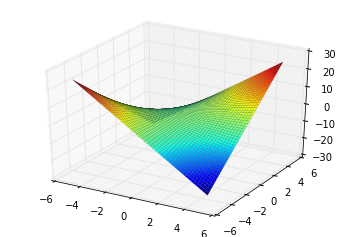

In [134]:
# 3d plots
from sympy import symbols
from sympy.plotting import plot3d
x,y = symbols('x,y')
plot3d(x*y, (x,-5,5), (y,-5,5))

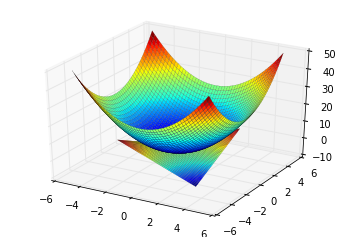

In [135]:
# multiple plots with multiple ranges
plot3d((x**2+y**2, (x,-5,5), (y,-5,5)) , (x*y, (x,-3,3), (y,-3,3)))

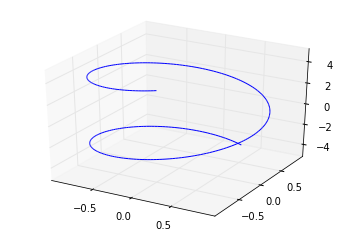

In [136]:
# 3d parametric plots
from sympy import symbols, sin,cos
from sympy.plotting import plot3d_parametric_line
u = symbols('u')
plot3d_parametric_line(cos(u), sin(u), u, (u,-5,5))

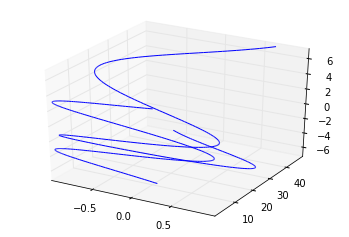

In [137]:
#multiple plots
plot3d_parametric_line((cos(u), sin(u), u, (u,-5,5)), (sin(u), u**2, u, (u,-7,7)) )

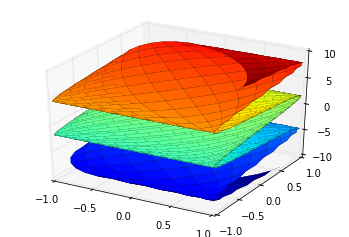

In [138]:
# plot 3d parametric surface
from sympy.plotting import plot3d_parametric_surface
u,v = symbols('u,v')
plot3d_parametric_surface(cos(u+v), sin(u-v), u-v, (u,-5,5), (v,-5,5))

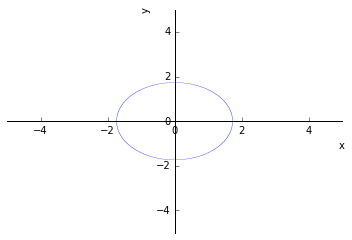

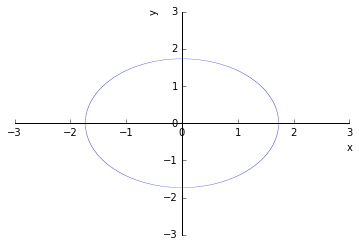

In [139]:
# plot implicit
from sympy import plot_implicit, cos, sin, symbols, Eq, And
x,y = symbols('x,y')
p1 = plot_implicit(Eq(x**2+y**2,3))
p2 = plot_implicit(Eq(x**2+y**2,3),(x,-3,3), (y,-3,3))

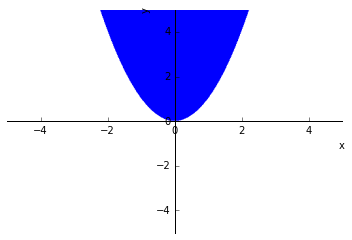

In [140]:
#plotting regions
p6 = plot_implicit(y>x**2)

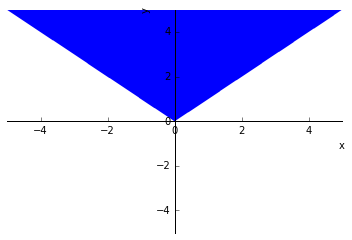

In [141]:
#plotting using boolean
p7 = plot_implicit(And(y>x, y >=-x))

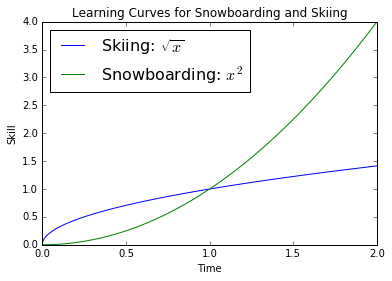

In [142]:
x = np.linspace(0,2, 1000)
f = mp.figure()
mp.plot(x, np.sqrt(x), label = r"Skiing: $\sqrt{x}$")
mp.plot(x, x**2, label = r"Snowboarding: $x^2$")
mp.title("Learning Curves for Snowboarding and Skiing")
mp.xlabel("Time") 
mp.ylabel("Skill")
mp.legend(loc='upper left')
mp.show()

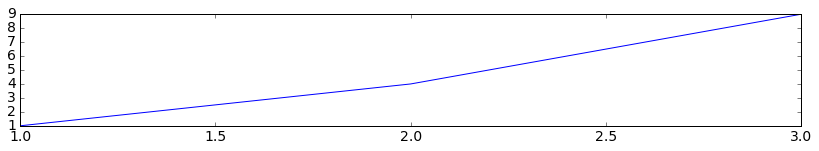

In [143]:
mp.rcParams['figure.figsize'] = (14, 2)  # (width, height)
mp.rcParams['font.size'] = 14
mp.rcParams['legend.fontsize'] = 16
mp.plot([1,2,3],[1,4,9])

In [144]:
mp.rcParams['figure.figsize'] = (8, 6)  # (width, height)

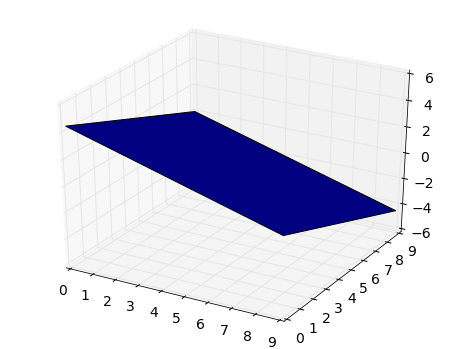

In [145]:
from mpl_toolkits.mplot3d import Axes3D
point  = np.array([1,2,3])
normal = np.array([1,1,2])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -np.sum(point*normal)# dot product

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0]*xx - normal[1]*yy - d)*1./normal[2]

# plot the surface
plt3d = mp.figure().gca(projection='3d')
plt3d.plot_surface(xx,yy,z)
mp.show()

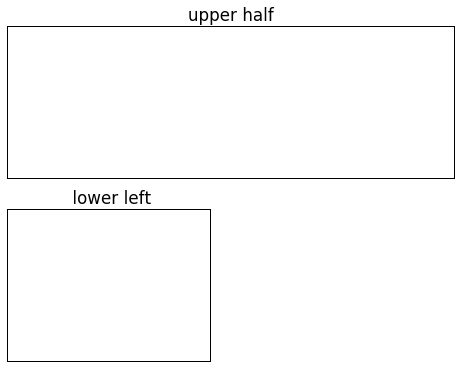

In [146]:
# subplots
mp.figure()
mp.subplot(2,1,1)
mp.xticks([])
mp.yticks([])
mp.title('upper half')
mp.subplot(2,2,3)
mp.title(' lower left')
mp.xticks([]);
mp.yticks([]);


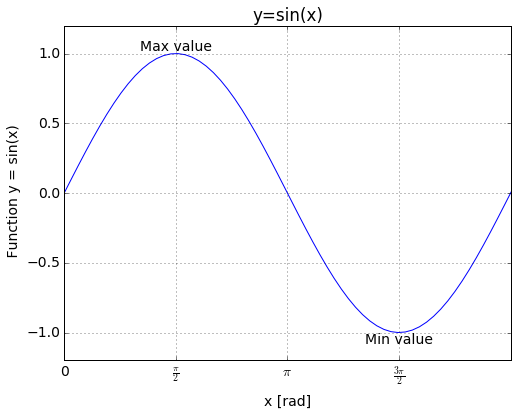

In [147]:
from numpy import pi, sin
I = np.arange(0, 2*pi+0.1, 0.1)
mp.plot(I,sin(I), label='sin(I)')
mp.title('y=sin(x)')
mp.xlabel('x [rad]')
mp.ylabel(' Function y = sin(x)')
mp.text(pi/2,1, 'Max value', ha = 'center', va='bottom')
mp.text(3*pi/2,-1, 'Min value', ha = 'center', va='top')
mp.xticks(arange(0, 2*pi, pi/2), 
         ('0', r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$'))
mp.xlim([0, 2*pi])
mp.ylim([-1.2, 1.2])
mp.grid() 

In [148]:
from IPython.html.widgets import interact
from IPython.display import display

from sympy import Symbol, Eq, factor, init_printing
init_printing(use_latex='mathjax')

x = Symbol('x')

def factorit(n):
    display(Eq(x**n-1, factor(x**n-1)))

interact(factorit, n=(2,20));

ImportError: No module named 'widgets'

In [ ]:
"""
Creating and plotting unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math
get_ipython().magic('matplotlib inline')

# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# Plot the triangulation.
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-')
plt.title('triplot of Delaunay triangulation')


# You can specify your own triangulation rather than perform a Delaunay
# triangulation of the points, where each triangle is given by the indices of
# the three points that make up the triangle, ordered in either a clockwise or
# anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

# Rather than create a Triangulation object, can simply pass x, y and triangles
# arrays to triplot directly.  It would be better to use a Triangulation object
# if the same triangulation was to be used more than once to save duplicated
# calculations.
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(x, y, triangles, 'go-')
plt.title('triplot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from itertools import product, combinations

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# Generate some example data
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

# concatenate data for PCA
samples = np.concatenate((class1_sample, class2_sample), axis=0)

# mean values
mean_x = np.mean(samples[:,0])
mean_y = np.mean(samples[:,1])
mean_z = np.mean(samples[:,2])

#eigenvectors and eigenvalues
eig_val, eig_vec = np.linalg.eig(cov_mat1)

################################
#plotting eigenvectors
################################    

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(samples[:,0], samples[:,1], samples[:,2], 'o', markersize=10, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], 
                [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('variable X')
ax.set_ylabel('variable Y')
ax.set_zlabel('variable Z')

plt.title('3D scatter plot with eigenvectors')

# Plot Cube
h = [-0.5, 0.5]
for s, e in combinations(np.array(list(product(h,h,h))), 2):
    if np.sum(np.abs(s-e)) == h[1]-h[0]:
        ax.plot3D(*zip(s,e), color="g")

plt.show()

# Drawing and Diagrams
[index](#Mechpy)

to install pysketcher run these commands for a windows machine

check out tutorials
http://hplgit.github.io/pysketcher/doc/pub/tutorial/._pysketcher002.html  


```bash
pip install future
choco install imagemagick -y # make sure to run as admin
git clone https://github.com/hplgit/pysketcher
cd pysketcher/
python setup.py install
```

In [ ]:
get_ipython().magic('matplotlib')  # seperate window

from pysketcher import *

L = 8.0
H = 1.0
xpos = 2.0
ypos = 3.0

drawing_tool.set_coordinate_system(xmin=0, xmax=xpos+1.2*L,
                                   ymin=0, ymax=ypos+5*H,
                                   axis=True)
drawing_tool.set_linecolor('blue')
drawing_tool.set_grid(True)
drawing_tool.set_fontsize(22)

P0 = point(xpos,ypos)
main = Rectangle(P0, L, H)
h = L/16  # size of support, clamped wall etc
support = SimplySupportedBeam(P0, h)
clamped = Rectangle(P0 + point(L, 0) - point(0,2*h), h, 6*h).set_filled_curves(pattern='/')
F_pt = point(P0[0]+L/2, P0[1]+H)
force = Force(F_pt + point(0,2*H), F_pt, '$F$').set_linewidth(3)
L_dim = Distance_wText((xpos,P0[1]-3*h), (xpos+L,P0[1]-3*h), '$L$')
beam = Composition({'main': main, 'simply supported end': support,
                    'clamped end': clamped, 'force': force,
                    'L': L_dim})
beam.draw()
beam.draw_dimensions()
drawing_tool.display()

get_ipython().magic('matplotlib inline') # inline plotting

In [ ]:
## Minimization of Potential Energy
# A structure made of masses and springs and we will minimize the potential energy to determien the deflection from a packt book i cannot remember

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(linewidth=150)
np.set_printoptions(precision=3)


plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 16

# Define constant in SI

g = 9.81
m= 0.1
n = 20
e = 0.1
l=e
k = 1e4

# define the initial positions of the masses
P0 = np.zeros((n,2))
P0[:,0] = np.repeat(e*np.arange(n//2),2)
P0[:,1] = np.tile((0,-e), n//2)

# Define the connectivity matrix between the masses. coefficient (i,j) is 1 if the masses i and j are connect by a spring, 0 otherwise
A = np.eye(n,n,1) + np.eye(n,n,2)


# Specifiy spring stiffness ofeach spring, where it is l for springs strait up/down or sideways (orthogonal) or l$\sqrt{2}$

L = l*(np.eye(n,n,1) + np.eye(n,n,2))
for i in range(n//2-1):
    L[2*i+1, 2*i+2] *= np.sqrt(2)

    
# Get the non-zero indices of the spring connections
I,J = np.nonzero(A)

#the dist function computes the distance matrix


dist = lambda P: np.sqrt( (P[:,0]-P[:,0][:,np.newaxis])**2 + (P[:,1]-P[:,1][:,np.newaxis])**2 )

#plotting function that shows the springs based on their tension

def show_bar(P):
    #Wall
    plt.axvline(0,color='k', lw=3)
    # Distance Matrix
    D = dist(P)
    #plot the springs
    for i, j in zip(I,J):
        c = D[i,j] - L[i,j]
        plt.plot(P[[i,j],0], P[[i,j],1], lw=2, color=plt.cm.copper(c*150))
    
    #plot the masses
    plt.plot(P[[I,J],0], P[[I,J],1], 'ok',)
    
    #configure axis
    plt.axis('equal')
    plt.xlim(P[:,0].min()-e/2, P[:,0].max()+e/2)
    plt.ylim(P[:,1].min()-e/2, P[:,1].max()+e/2)
    plt.xticks([]) ; plt.yticks([])
show_bar(P0)
plt.title('Initial Configuration')
plt.show()    

#To determine the equilibrium state, we need to minimize the potential energy of the system. This function computes the ebergy of the system given the positions  of the masses
def energy(P):
    # flatten the position matrix
    P = P.reshape((-1,2))
    # compute the distance matrix
    D = dist(P)
    #the potential energy is the sum of the gravitationla and elastic potential energies
    PE = (g*m*P[:,1].sum() + 0.5 * (k *A *(D-L)**2).sum())
    return PE    

#Computute the potential energy at the initial configureation
print(energy(P0.ravel()))

bounds = np.c_[P0[:2,:].ravel(), P0[:2,:].ravel()].tolist() + [[None, None]] * (2*(n-2))
P1 = opt.minimize(energy, P0.ravel(), method='L-BFGS-B', bounds=bounds).x.reshape((-1, 2))
show_bar(P1)
plt.title("Equilibrium configuration")

- - - -
# Finite Element Method with Python
[index](#Mechpy)
- - - -

>[Sparse matrices (scipy.sparse)](http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html)

>[Sparse Matrices in SciPy](https://scipy-lectures.github.io/advanced/scipy_sparse/)

>[The FEniCS Book: Automated Solution of Differential Equations by the Finite Element Method](http://fenicsproject.org/book/index.html#book)

>[FEniCS tutorial (Python)](http://fenicsproject.org/documentation/tutorial/)

>[SfePy: Simple Finite Elements in Python](http://sfepy.org/doc-devel/index.html)

In [ ]:
"""
https://dl.dropboxusercontent.com/u/550684/pyfem-doc/html/index.html
"""

from pyfem import *

my_block = Block2D()
my_block.set_coords( [[0,0],[1,0],[1,1],[0,1]] )
my_block.set_quadratic()
my_block.set_divisions(10, 10)

my_mesh = Mesh()
my_mesh.add_blocks(my_block)
my_mesh.generate()
my_mesh.write("my_mesh.vtk")


In [ ]:
'''
http://mbi-wiki.uni-wuppertal.de/en/python/english-fem-with-python/
'''
from numpy import matrix, linalg
from math import *
print( 'KU=F')
l = 1.5
d = 3
F1=F2=F3=F4=F5=F6=F7=F8=F9=F10=0
# K Matrix of order 10 x 10
A = (pi/4)*(d*d)
E = 200
#multiplying factor
m = (E*A)/ (2*1.414*l)
F1 = 4
F = matrix([[F1],[F2],[F3],[F4],[F5],[F6],[F7],[F8],[F9],[F10]])  
# K Matrix of order 10 x 10
K = m * matrix([[2.828,4,0,0,0,0,0,0,0,0],\
            [-2,4 ,0,0,0,0,0,0,0,0],\
            [0,0,4.828,0,0,0,0,0,0,0],\
            [0,0,0,2,0,0,0,0,0,0],\
            [0,0,0,0,1.414,0,0,0,0,0],\
            [0,0,0,0,0,-2,0,0,0,0],\
            [0,0,0,0,0,0,4.828,0,0,0],\
            [0,0,0,0,0,0,0,2,0,0],\
            [0,0,0,0,0,0,0,0,1.414,0],\
            [0,0,0,0,0,0,0,0,0,-2]])
                        
# U = (Inverse of K)* F
C = K.I
#C  matrix is the inverse of  K
print("The  Deformation matrix is: ")
#Now , multiplying the inverse of k matrix with force matri
# The output shows the deformation matrix in column wise :
print(C*F)
print(" The above values are the deformations induced at each node:")

In [ ]:
#%%
"""
http://download.gna.org/getfem/html/homepage/python/pygf.html
"""

import getfem
m = getfem.Mesh('cartesian', range(0, 3), range(0,3))